In [1]:
import pandas as pd 
import numpy as np
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from IPython.display import display

In [ ]:
from ingest_data import load_eviction
df = pd.read_csv('preprocessed_eviction_data.csv')

10010 rows were dropped due to missing values.
166 rows were dropped due to duplicate entries.
Eviction data with shape (98363, 21) loaded.


In [ ]:
eviction_counts = df.groupby(['BOROUGH', 'Year']).size().unstack(fill_value=0)
eviction_counts

Year,2017,2018,2019,2020,2021,2022,2023,2024,2025
BOROUGH,,,,,,,,,
BRONX,7303,6802,5956,1037,22,1114,4132,4488,2099
BROOKLYN,5605,5488,4763,915,78,1643,3569,4091,1536
MANHATTAN,3193,3076,2551,464,60,820,2388,2913,965
QUEENS,3753,3793,3175,603,26,674,1721,3357,1095
STATEN ISLAND,495,503,505,82,32,258,531,637,218


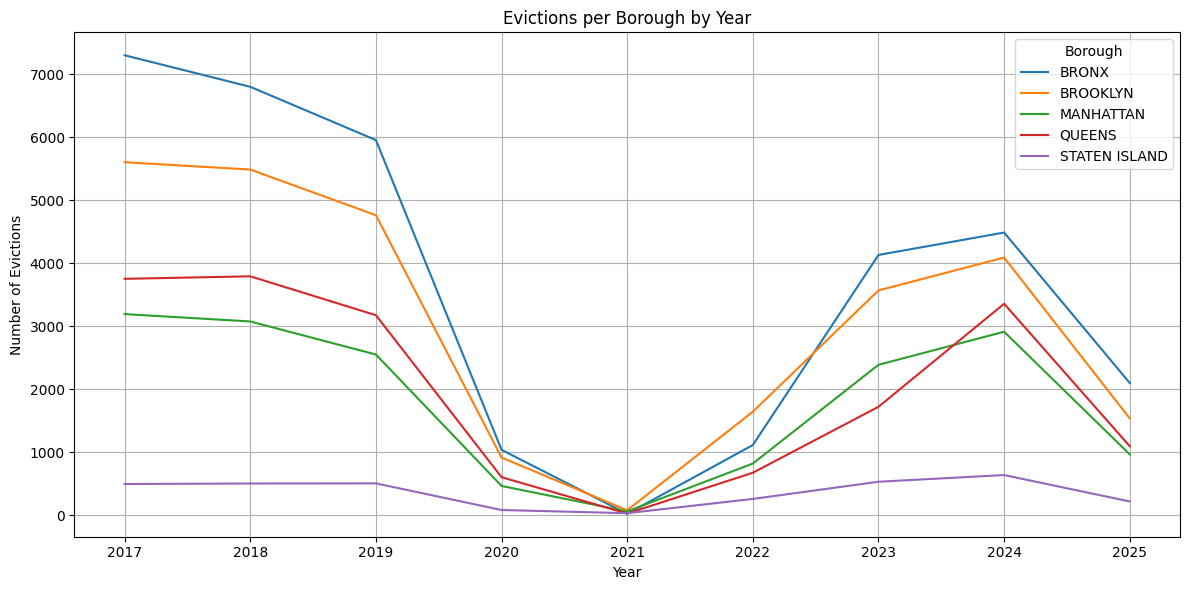

In [ ]:
eviction_counts.T.plot(figsize=(12, 6))  # Transpose to get years on x-axis
plt.title("Evictions per Borough by Year")
plt.xlabel("Year")
plt.ylabel("Number of Evictions")
plt.legend(title="Borough")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#make a df geo that just has latitude, longitude, and year 
df_geo = df.loc[df['Year'] == 2025][['Latitude', 'Longitude', 'Year']]
df_geo = df_geo.copy()  # Creates a new independent copy of the DataFrame
df_geo["lat_bin"] = df_geo["Latitude"].round(3)
df_geo["lon_bin"] = df_geo["Longitude"].round(3)
df_geo.head()

,Latitude,Longitude,Year,lat_bin,lon_bin
31,40.799553,-73.960833,2025,40.800,-73.961
39,40.649262,-74.011146,2025,40.649,-74.011
56,40.814420,-73.909655,2025,40.814,-73.910
91,40.739412,-73.906447,2025,40.739,-73.906
107,40.870099,-73.893692,2025,40.870,-73.894


In [ ]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
heat_data = df_geo[["lat_bin", "lon_bin"]].values.tolist()
HeatMap(heat_data, radius=10).add_to(m)
display(m)

In [ ]:
eviction_time_series = (
    df_geo.groupby(["Year", "lat_bin", "lon_bin"])
    .size()
    .reset_index(name="eviction_count")
)